In [ ]:
### Question 3

In [1]:
import pandas as pd

### Reading the json file from the URL provided and storing it as 'data'
data=pd.read_json('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')

### Storing all rows of the only column in 'data' into 'dicts'
dicts=data.iloc[:,0]

### Using list comprehension to segregate/list all the dictionaries present in dicts
rows_columns=[i for i in dicts]

### Feeding all the list of dictionaries(keys as columns,values as records/rows)
new_data=pd.DataFrame(rows_columns)

In [2]:
### Converting the datatype of column 'num' from 'object' to 'int'
new_data['num']=new_data['num'].astype('int')

In [3]:
### Replacing 'm' in all the rows of column 'height' with an empty string
new_data['height']=new_data['height'].str.replace('m','')

In [4]:
### Converting the datatype of column 'height' from 'object' to 'float'
new_data['height']=new_data['height'].astype('float')

In [5]:
### Renaming the column 'height' as 'height(mts): 'mts' represent units->meters
new_data.rename(columns={'height':'height(mts)'},inplace=True)

In [6]:
### Replacing 'kg' in all the rows of column 'weight' with an empty string
new_data['weight']=new_data['weight'].str.replace('kg','')

### Converting the datatype of column 'weight' from 'object' to 'float'
new_data['weight']=new_data['weight'].astype('float')

### Renaming the column 'height' as 'height(mts): 'mts' represent units->meters
new_data.rename(columns={'weight':'weight(kg)'},inplace=True)

In [7]:
### Repacing 'Not in Eggs' and 'Omanyte Candy' wherever present in the entire column 'egg' with '0 km'
new_data['egg']=new_data['egg'].replace(['Not in Eggs','Omanyte Candy'],'0 km')

In [8]:
### Repacing 'km' wherever present in the entire column 'egg' with empty string
new_data['egg']=new_data['egg'].str.replace('km','')

In [9]:
### Converting the datatype of column 'egg' from 'object' to 'float'
new_data['egg']=new_data['egg'].astype('float')

In [10]:
### Repacing 'N/A' wherever present in the entire column 'spawn_time' with empty '00:00'
new_data['spawn_time']=new_data['spawn_time'].str.replace('N/A','00:00')

In [11]:
### Converting the datatype from 'object' to 'datetime' and to 'minutes:seconds' format
new_data['spawn_time']=pd.to_datetime(new_data['spawn_time'],format='%M:%S').dt.strftime('%M:%S')

In [52]:
### Converting the dataframe to the excel format
new_data.to_excel('converted_to-excel.xlsx',index=False)

In [13]:
### Question 6:
### Note: 'new_data' from the Question 3 is used here

/tmp/ipykernel_78/355927914.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['spawn_chance'])


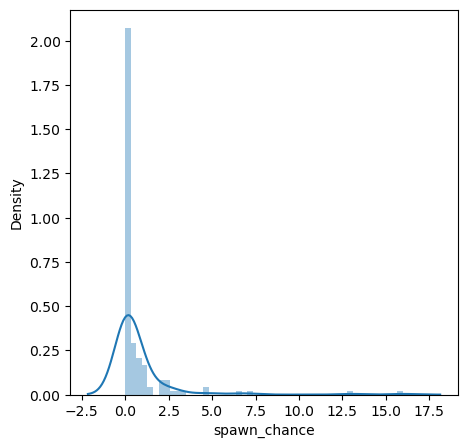

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.distplot(new_data['spawn_chance'])
plt.show()

In [ ]:
● Get all Pokemons whose spawn rate is less than 5%

In [12]:
new_data[new_data['spawn_chance']<0.05][['id','name']]

,id,name
1,2,Ivysaur
2,3,Venusaur
4,5,Charmeleon
5,6,Charizard
7,8,Wartortle
...,...,...
145,146,Moltres
147,148,Dragonair
148,149,Dragonite
149,150,Mewtwo


In [ ]:
● Get all Pokemons that have less than 4 weaknesses

In [13]:
new_data['weaknesses']

0      [Fire, Ice, Flying, Psychic]
1      [Fire, Ice, Flying, Psychic]
2      [Fire, Ice, Flying, Psychic]
3             [Water, Ground, Rock]
4             [Water, Ground, Rock]
                   ...             
146            [Ice, Dragon, Fairy]
147            [Ice, Dragon, Fairy]
148      [Ice, Rock, Dragon, Fairy]
149              [Bug, Ghost, Dark]
150              [Bug, Ghost, Dark]
Name: weaknesses, Length: 151, dtype: object

In [14]:
### Following are the pokemons that have less than 4 weaknesses
new_data[new_data['weaknesses'].apply(lambda x:len(x))<4][['id','name','weaknesses']]

,id,name,weaknesses
3,4,Charmander,"[Water, Ground, Rock]"
4,5,Charmeleon,"[Water, Ground, Rock]"
5,6,Charizard,"[Water, Electric, Rock]"
6,7,Squirtle,"[Electric, Grass]"
7,8,Wartortle,"[Electric, Grass]"
...,...,...,...
145,146,Moltres,"[Water, Electric, Rock]"
146,147,Dratini,"[Ice, Dragon, Fairy]"
147,148,Dragonair,"[Ice, Dragon, Fairy]"
149,150,Mewtwo,"[Bug, Ghost, Dark]"


In [15]:
#### Following is the list of 102 pokemons that have less than 4 weaknesses
a=new_data[new_data['weaknesses'].apply(lambda x:len(x))<4][['id','name','weaknesses']]
a['name'].unique()

array(['Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle',
       'Blastoise', 'Caterpie', 'Metapod', 'Pidgey', 'Pidgeotto',
       'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans',
       'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran ♀ (Female)', 'Nidorina', 'Nidoran ♂ (Male)', 'Nidorino',
       'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff',
       'Wigglytuff', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Poliwag', 'Poliwhirl', 'Abra', 'Kadabra', 'Alakazam', 'Machop',
       'Machoke', 'Machamp', 'Tentacool', 'Tentacruel', 'Ponyta',
       'Rapidash', 'Magnemite', 'Magneton', "Farfetch'd", 'Doduo',
       'Dodrio', 'Seel', 'Grimer', 'Muk', 'Shellder', 'Drowzee', 'Hypno',
       'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak',
       'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Koffing', 'Weezing',
       'Chansey', 'Kangas

In [ ]:
● Get all Pokemons that have no multipliers at all

In [17]:
new_data[new_data['multipliers'].isnull()][['id','name']]

,id,name
2,3,Venusaur
5,6,Charizard
8,9,Blastoise
11,12,Butterfree
14,15,Beedrill
...,...,...
144,145,Zapdos
145,146,Moltres
148,149,Dragonite
149,150,Mewtwo


In [18]:
b=new_data[new_data['multipliers'].isnull()][['id','name']]
b['name'].unique()

array(['Venusaur', 'Charizard', 'Blastoise', 'Butterfree', 'Beedrill',
       'Pidgeot', 'Raticate', 'Fearow', 'Arbok', 'Raichu', 'Sandslash',
       'Nidoqueen', 'Nidoking', 'Clefable', 'Ninetales', 'Wigglytuff',
       'Golbat', 'Vileplume', 'Parasect', 'Venomoth', 'Dugtrio',
       'Persian', 'Golduck', 'Primeape', 'Arcanine', 'Poliwrath',
       'Alakazam', 'Machamp', 'Victreebel', 'Tentacruel', 'Golem',
       'Rapidash', 'Slowbro', 'Magneton', "Farfetch'd", 'Dodrio',
       'Dewgong', 'Muk', 'Cloyster', 'Gengar', 'Onix', 'Hypno', 'Kingler',
       'Electrode', 'Exeggutor', 'Marowak', 'Hitmonlee', 'Hitmonchan',
       'Lickitung', 'Weezing', 'Rhydon', 'Chansey', 'Tangela',
       'Kangaskhan', 'Seadra', 'Seaking', 'Starmie', 'Mr. Mime',
       'Scyther', 'Jynx', 'Electabuzz', 'Magmar', 'Pinsir', 'Tauros',
       'Gyarados', 'Lapras', 'Ditto', 'Vaporeon', 'Jolteon', 'Flareon',
       'Porygon', 'Omastar', 'Kabutops', 'Aerodactyl', 'Snorlax',
       'Articuno', 'Zapdos', 'Moltres', 

#### The above is the list of 81 pokemons having no multipliers at all

In [ ]:
● Get all Pokemons that do not have more than 2 evolutions

In [19]:
#Let us fill the NaN or Null values with the empty string in order to calculate the number of 
#evolutions of a pokemon
new_data['next_evolution']=new_data['next_evolution'].fillna('')

In [20]:
#Let us fill the NaN or Null values with the empty string in order to calculate the number of 
#evolutions of a pokemon
new_data['prev_evolution']=new_data['prev_evolution'].fillna('')

In [21]:
##finding the total number of evolutions(both previous and next evolutions) which have more than 2 evolutions
new_data[(new_data['next_evolution'].apply(lambda x:len(x))+new_data['prev_evolution'].apply(lambda x:len(x)))>2]

,id,num,name,img,type,height(mts),weight(kg),candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
132,133,133,Eevee,http://www.serebii.net/pokemongo/pokemon/133.png,[Normal],0.3,6.5,Eevee Candy,25.0,10.0,2.75,275.0,05:32,"[2.02, 2.64]",[Fighting],"[{'num': '134', 'name': 'Vaporeon'}, {'num': '...",


In [22]:
new_data['next_evolution'][132]

[{'num': '134', 'name': 'Vaporeon'},
 {'num': '135', 'name': 'Jolteon'},
 {'num': '136', 'name': 'Flareon'}]

#### Note that except for the pokeman named "Eevee", all the pokemons do not have more than 2 evolutions

In [ ]:
● Get all Pokemons whose spawn time is less than 300 seconds.

In [23]:
##Extracting the spawn time in seconds for each pokemon and comapring with 300 seconds 
new_data[new_data['spawn_time'].apply(lambda x:int(x.split(':')[0])*60 + int(x.split(':')[1]))<300][['id','name']]

,id,name
6,7,Squirtle
8,9,Blastoise
10,11,Metapod
12,13,Weedle
13,14,Kakuna
...,...,...
143,144,Articuno
144,145,Zapdos
145,146,Moltres
149,150,Mewtwo


In [24]:
c=new_data[new_data['spawn_time'].apply(lambda x:int(x.split(':')[0])*60 + int(x.split(':')[1]))<300][['id','name']]
c['name'].unique()

array(['Squirtle', 'Blastoise', 'Metapod', 'Weedle', 'Kakuna', 'Beedrill',
       'Pidgey', 'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Fearow',
       'Arbok', 'Pikachu', 'Sandshrew', 'Nidoran ♀ (Female)',
       'Nidoran ♂ (Male)', 'Clefairy', 'Clefable', 'Ninetales', 'Golbat',
       'Oddish', 'Paras', 'Parasect', 'Venonat', 'Diglett', 'Meowth',
       'Persian', 'Psyduck', 'Growlithe', 'Arcanine', 'Poliwag',
       'Poliwrath', 'Abra', 'Machop', 'Machamp', 'Bellsprout',
       'Tentacool', 'Graveler', 'Ponyta', 'Rapidash', 'Slowbro',
       'Magnemite', "Farfetch'd", 'Dodrio', 'Muk', 'Cloyster', 'Gastly',
       'Haunter', 'Gengar', 'Onix', 'Drowzee', 'Hypno', 'Krabby',
       'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak',
       'Hitmonlee', 'Lickitung', 'Rhyhorn', 'Chansey', 'Kangaskhan',
       'Horsea', 'Seadra', 'Goldeen', 'Mr. Mime', 'Electabuzz', 'Pinsir',
       'Tauros', 'Gyarados', 'Ditto', 'Jolteon', 'Porygon', 'Kabuto',
       'Articuno', 'Zapdos', 'Moltres

#### The above is the list of 81 pokemons having spawn time lessthan 300 seconds

In [ ]:
● Get all Pokemon who have more than two types of capabilities

In [67]:
new_data[new_data['type'].apply(lambda x:len(x))>2].shape

(0, 17)

#### There are no pokemons having more than two types of capabilties